<a href="https://colab.research.google.com/github/gabrieldorte/analise_data_amaciante/blob/main/an%C3%A1lise_dados_amaciantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORTAÇÃO DAS BIBLIOTECAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#DEFININDO PALETA DE CORES
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [8]:
#LEITURA DA BASE DE DADOS
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/volume_amaciante.csv")

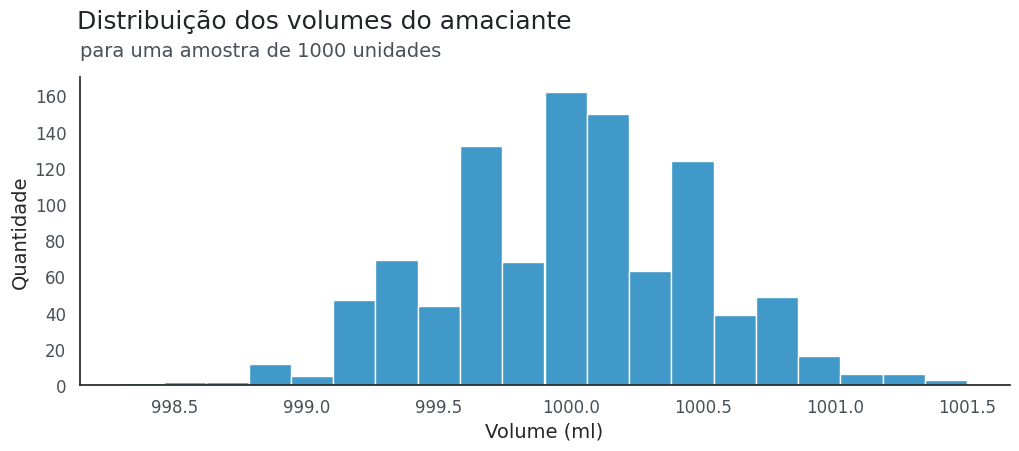

In [11]:
#GRÁFICO PARA DISTRIBUIÇÃO DOS VOLUMES
fig, ax = plt.subplots(figsize=(12,4))
sns.set_theme(style="white")
ax = sns.histplot(data = vol_amaciante, x = "Volume", bins = 20, color = AZUL2)  # ajustando o intervalo pelo quantidade de bins
plt.suptitle('Distribuição dos volumes do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.535, y = 1.05)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('Volume (ml)', fontsize = 14)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

plt.show()